In [48]:
import numpy as np
import random


In [49]:
def init_parameters(input_size, hidden_size, output_size):
    weights_1 = np.random.uniform(-1, 1, (input_size, hidden_size))
    weights_2 = np.random.uniform(-1, 1, (hidden_size, output_size))
    return weights_1, weights_2


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def forward(inputs, weights_1, weights_2):
    hidden_input = np.dot(inputs, weights_1)
    #actiavtion function goes here
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_2)
    #actiavtion function goes here

    final_output = sigmoid(final_input)
    return hidden_output, final_output

def backward(inputs, hidden_output, final_output, targets, weights_2):
    #output error when we compare are output from 
    # forward propgating through the network
    output_errors = targets - final_output

    output_delta = output_errors * (final_output)

    #compute gradient for output weights
    weight_changes_2 = np.outer(hidden_output, output_delta)

    hidden_errors = np.dot(output_delta, weights_2.T)

    hidden_delta = hidden_errors * (hidden_output)

    weight_changes_1 = np.outer(inputs, hidden_delta)
    
    return weight_changes_1, weight_changes_2, np.mean(output_errors ** 2)

def update_weights(weights, weight_changes, learning_rate):
    weights += learning_rate * weight_changes
    weight_changes = 0
    return weights , weight_changes

In [50]:
input_size = 2
hidden_size = 4
output_size = 1
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
targets = np.array([[0], [1], [1], [0]])

weights_1, weights_2 = init_parameters(input_size, hidden_size, output_size)

learning_rate = 0.1
epochs = 10000
error_list = []


#Training loop
for epoch in range(epochs):
    error_sum = 0
    for I, T in zip(inputs, targets):


        #Forward propograte
        hidden_output, final_output = forward(I, weights_1, weights_2)
        
        #Backward propogate
        weight_changes_1, weight_changes_2, error = backward(
            I, hidden_output, final_output, T, weights_2)
        
        error_sum += error
        
        #Update weights
        weights_1 , weight_changes_1 = update_weights(weights_1, weight_changes_1, learning_rate)
        weights_2 , weight_changes_2= update_weights(weights_2, weight_changes_2, learning_rate)
    error_list.append(error_sum)
    # Optionally print error every 1000 epochs
    if epoch % 1 == 0:
        print(f"Epoch {epoch}, Error: {error_sum}")

Epoch 0, Error: 1.007531084320517
Epoch 1, Error: 1.0071398128864097
Epoch 2, Error: 1.0068234863159167
Epoch 3, Error: 1.0065699721516825
Epoch 4, Error: 1.0063690626348647
Epoch 5, Error: 1.0062121613818968
Epoch 6, Error: 1.0060920232446462
Epoch 7, Error: 1.0060025379035202
Epoch 8, Error: 1.0059385494932456
Epoch 9, Error: 1.0058957059773648
Epoch 10, Error: 1.0058703331342116
Epoch 11, Error: 1.005859328946531
Epoch 12, Error: 1.0058600749411868
Epoch 13, Error: 1.0058703616385258
Epoch 14, Error: 1.0058883257702793
Epoch 15, Error: 1.005912397332267
Epoch 16, Error: 1.0059412548712676
Epoch 17, Error: 1.0059737876783272
Epoch 18, Error: 1.0060090637848624
Epoch 19, Error: 1.0060463028423086
Epoch 20, Error: 1.0060848531181303
Epoch 21, Error: 1.006124171966692
Epoch 22, Error: 1.0061638092375573
Epoch 23, Error: 1.0062033931701952
Epoch 24, Error: 1.006242618395893
Epoch 25, Error: 1.0062812357275746
Epoch 26, Error: 1.0063190434681872
Epoch 27, Error: 1.006355880010171
Epoch 28

In [43]:
input_size = 2
hidden_size = 4
output_size = 1
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
targets = np.array([[0], [1], [1], [0]])

weights_1, weights_2 = init_parameters(input_size, hidden_size, output_size)

learning_rates = [0.01, 0.1, 0.2, 0.3]
epochs = 10000
error_dict = {}

for lr in learning_rates:
    # Initialize weights for each learning rate
    weights_1, weights_2 = init_parameters(input_size, hidden_size, output_size)
    
    # Initialize a list to store the errors
    error_list = []
    
    # Training loop
    for epoch in range(epochs):
        error_sum = 0
        for I, T in zip(inputs, targets):

            # Forward propagate
            hidden_output, final_output = forward(I, weights_1, weights_2)
            
            # Backward propagate
            weight_changes_1, weight_changes_2, error = backward(
                I, hidden_output, final_output, T, weights_2)
            
            error_sum += error
            
            # Update weights
            weights_1, weight_changes_1 = update_weights(weights_1, weight_changes_1, lr)
            weights_2, weight_changes_2 = update_weights(weights_2, weight_changes_2, lr)
        
        # Append the error_sum to the error_list
        error_list.append(error_sum)
    
    # Store the error_list in the dictionary with the learning rate as key
    error_dict[lr] = error_list
    
    # Optionally print error every 1000 epochs
    if epochs <= 1000 or epoch % (epochs // 10) == 0:
        print(f"Learning Rate {lr}, Epoch {epoch}, Error: {error_sum}")

In [44]:
error_dict

{0.01: [1.0031006172462398,
  1.0030687574147534,
  1.003037227942747,
  1.003006025053275,
  1.0029751450146724,
  1.0029445841399816,
  1.0029143387863846,
  1.0028844053546484,
  1.0028547802885712,
  1.002825460074441,
  1.0027964412404986,
  1.00276772035641,
  1.002739294032744,
  1.002711158920457,
  1.0026833117103864,
  1.002655749132749,
  1.0026284679566473,
  1.00260146498958,
  1.002574737076963,
  1.002548281101654,
  1.0025220939834814,
  1.002496172678787,
  1.0024705141799655,
  1.0024451155150158,
  1.0024199737470985,
  1.0023950859740944,
  1.0023704493281755,
  1.002346060975376,
  1.0023219181151717,
  1.0022980179800651,
  1.0022743578351747,
  1.0022509349778301,
  1.002227746737174,
  1.0022047904737665,
  1.0021820635791978,
  1.0021595634757023,
  1.0021372876157821,
  1.0021152334818313,
  1.0020933985857692,
  1.0020717804686738,
  1.0020503767004239,
  1.0020291848793446,
  1.0020082026318566,
  1.0019874276121312,
  1.001966857501749,
  1.001946490009364,

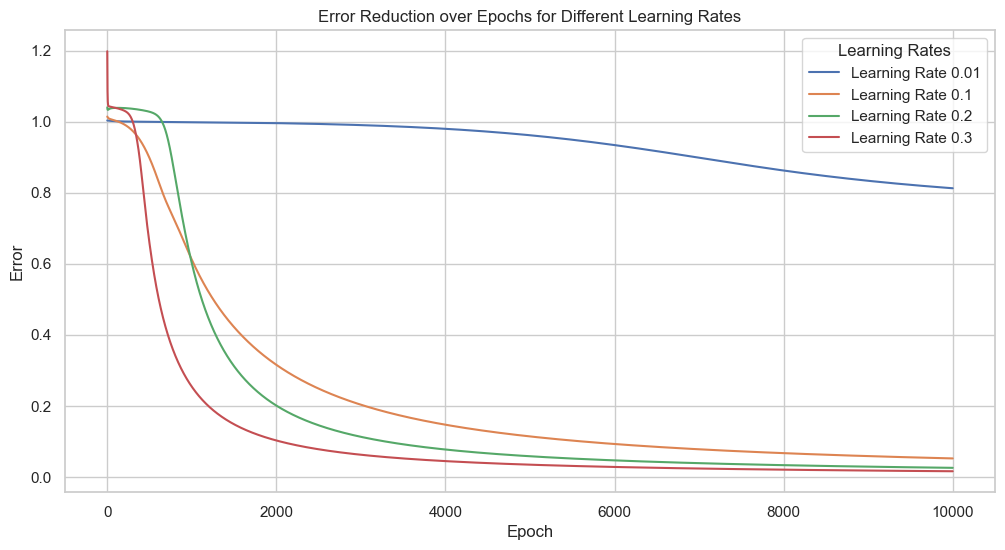

In [45]:

# Plotting the error reduction over epochs for different learning rates
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

for lr in learning_rates:
    sns.lineplot(x=range(epochs), y=error_dict[lr], label=f'Learning Rate {lr}')

plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error Reduction over Epochs for Different Learning Rates')
plt.legend(title='Learning Rates')
plt.show()

In [46]:
for I in inputs:
    _, final_output = forward(I, weights_1, weights_2)
    print(f"Input: {I}, Predicted Output: {final_output}")


Input: [0 0], Predicted Output: [0.06329275]
Input: [0 1], Predicted Output: [0.99347015]
Input: [1 0], Predicted Output: [0.99345596]
Input: [1 1], Predicted Output: [0.0913543]


In [23]:
error_list

[1.1196503450655646,
 1.1067584883015935,
 1.0987291704673006,
 1.0937694607686606,
 1.0906372094637866,
 1.0885511754698016,
 1.0870509494477758,
 1.0858765027021835,
 1.0848847812661573,
 1.083998196847319,
 1.0831748810863469,
 1.0823921850716467,
 1.0816377381585454,
 1.0809046627336367,
 1.0801890260312295,
 1.079488483288705,
 1.0788015529716215,
 1.0781272276549196,
 1.0774647638655614,
 1.0768135679015822,
 1.076173133467691,
 1.0755430074699528,
 1.0749227711973375,
 1.074312029939655,
 1.0737104072316184,
 1.0731175416219676,
 1.0725330848051027,
 1.0719567004722157,
 1.071388063528286,
 1.0708268594831414,
 1.0702727839152737,
 1.0697255419574572,
 1.069184847780861,
 1.068650424069149,
 1.0681220014816537,
 1.0675993181082246,
 1.0670821189197173,
 1.0665701552182698,
 1.0660631840911412,
 1.0655609678712974,
 1.0650632736072685,
 1.0645698725441886,
 1.0640805396173951,
 1.0635950529595088,
 1.0631131934215754,
 1.0626347441085553,
 1.062159489929278,
 1.061687217160817,
 

In [51]:
output, hidden_neurons = forward(inputs, weights_1, weights_2)
output

array([[ 0.        ],
       [-0.26796529],
       [ 0.05703073],
       [-0.21093456]])

In [52]:
t=np.array([[0],[1],[1],[0]])
output_errors = t - output
output_errors

array([[0.        ],
       [1.26796529],
       [0.94296927],
       [0.21093456]])

In [53]:
output_deltas = output_errors * output
output_deltas

array([[ 0.        ],
       [-0.33977069],
       [ 0.05377823],
       [-0.04449339]])

In [54]:
weight_changes_2 = np.outer(hidden_neurons,output_deltas)
weight_changes_2

array([[ 0.        , -0.        ,  0.        , -0.        ],
       [ 0.        , -0.        ,  0.        , -0.        ],
       [ 0.        , -0.        ,  0.        , -0.        ],
       [ 0.        , -0.        ,  0.        , -0.        ],
       [-0.        ,  0.09261024, -0.01465816,  0.01212742],
       [ 0.        , -0.15185062,  0.02403461, -0.01988503],
       [ 0.        , -0.07116559,  0.01126395, -0.00931922],
       [ 0.        , -0.26117365,  0.04133804, -0.03420101],
       [ 0.        , -0.16688968,  0.02641497, -0.02185441],
       [-0.        ,  0.07811331, -0.01236362,  0.01022903],
       [ 0.        , -0.22413151,  0.03547509, -0.0293503 ],
       [-0.        ,  0.06408313, -0.01014295,  0.00839176],
       [ 0.        , -0.07427944,  0.0117568 , -0.00972698],
       [ 0.        , -0.07373731,  0.01167099, -0.00965599],
       [ 0.        , -0.2952971 ,  0.04673904, -0.03866952],
       [ 0.        , -0.19709052,  0.03119509, -0.02580925]])

In [55]:
hidden_errors = np.dot(output_deltas, weights_2.T)  
hidden_errors


array([[ 0.        ,  0.        , -0.        , -0.        ],
       [-0.31121631, -0.24083769,  0.1491523 ,  0.10747655],
       [ 0.0492587 ,  0.03811931, -0.02360753, -0.01701117],
       [-0.04075416, -0.03153799,  0.01953168,  0.01407419]])

In [57]:
hidden_deltas = hidden_errors*hidden_neurons
hidden_deltas

array([[ 0.        ,  0.        , -0.        , -0.        ],
       [ 0.08482726, -0.1076354 ,  0.03124022,  0.08261467],
       [ 0.02419505, -0.00876363, -0.01557283,  0.00320843],
       [-0.00890953, -0.0068444 ,  0.01697512,  0.008164  ]])

In [58]:
weight_changes_2 = np.outer(inputs,hidden_deltas)
weight_changes_2

array([[ 0.        ,  0.        , -0.        , -0.        ,  0.        ,
        -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        -0.        ,  0.        , -0.        , -0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        , -0.        , -0.        ,  0.        ,
        -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        -0.        ,  0.        , -0.        , -0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        , -0.        , -0.        ,  0.        ,
        -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        -0.        ,  0.        , -0.        , -0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        , -0.        , -0.        ,  0.08482726,
        -0.1076354 ,  0.03124022,  0.08261467,  0.02419505, -0.00876363,
        -0.01557283,  0.00320843, -0.00890953, -0.0068444 ,  0.01697512,
         0.008164  ],
       [ 0.        ,  0.        , -0

In [ ]:
for epoch in range(max_epochs):
    error = 0
    for iteration, (I, T) in enumerate(zip(examples, targets)):
        # Forward pass
        mlp.forward(I)
        
        # Backward pass and accumulate error
        error += mlp.backward(I, T)
        
        # Update weights every 'update_interval' examples
        if (iteration + 1) % update_interval == 0:
            mlp.update_weights(learning_rate)
    
    # Optionally print error every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {error}")

In [ ]:
for (int e=0; e<maxEpochs; e++) {
error = 0;
for (int p=0; p< numExamples; p++) {
NN.forward(example[p].input);
error += NN.backwards(example[p].output);
every now and then {
updateWeights(some_small_value);
}
}
cout << “Error at epoch “ << e << “ is “ << error << “\n”;
}


In [ ]:
#softmax entropy  loss after softmax
#lin output sqaured

In [ ]:
#implement backpropogation
#implement forwards propogation
#implement optimizes
#implement activation functions




create a netowork with any number inputs(adapt for the problem) and also any outputs sigmoidal or linear(depends on problem he gives 3 problems 2 for basic and 1 for exceptional(3rd one to use softmax))


any number of hidden units sigmoidal or tanh(can implement multiple hidden layers)

Important to have facility to intialize weights to small random values(people lose marks here) must consider simplest thing is random numbers uniformly distributed either side of 0 with small intervals but also take into account the number of inputs(maybe divide by the number of inputs or square root number of inputs)